# Pipeline de pre-procesamiento de datos

## Ejemplo

1. Cargaremos el dataset breast_cancer de sklearn, que tiene tanto columnas numéricas como categóricas simuladas (transformaremos una columna numérica en categórica para el ejemplo).
2. Definiremos columnas numéricas y categóricas.
3. Crearemos transformadores para cada tipo de dato:
4. Para las columnas numéricas: Imputaremos valores faltantes usando la mediana y escalaremos los datos.
5. Para las columnas categóricas: Usaremos OneHotEncoder para crear variables dummy.
6. Construiremos un pipeline que integre la preprocesamiento y un modelo de clasificación (Regresión Logística).
7. Entrenaremos y evaluaremos el modelo.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

# Convertir una columna numérica a categórica para el ejemplo
X['mean radius category'] = pd.cut(X['mean radius'], bins=3, labels=['small', 'medium', 'large'])

# Definir las columnas numéricas y categóricas
numeric_features = ['mean texture', 'mean area', 'mean smoothness']
categorical_features = ['mean radius category']

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Crear un Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el Pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred = pipeline.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Precisión del modelo: 0.96


## Explicación Paso a Paso

1. Cargar el dataset: Usamos load_breast_cancer que proporciona datos sobre características de los tumores y si son benignos o malignos.

2. Preprocesamiento:
    * Columnas numéricas: Aplicamos SimpleImputer para manejar valores faltantes y StandardScaler para normalizar.
    * Columnas categóricas: Convertimos una columna numérica en categórica para hacer OneHotEncoding.

3. Pipeline:
    * Definimos un pipeline que integra el preprocesamiento y el modelo de clasificación (LogisticRegression).

4. Entrenamiento y evaluación:
    * Entrenamos el pipeline y evaluamos la precisión del modelo

**¿Por qué usar un Pipeline?**

* Modularidad: Separa el preprocesamiento del entrenamiento del modelo.

* Reproducibilidad: Garantiza que el preprocesamiento se aplique de la misma manera durante el entrenamiento y la predicción.

* Facilidad de uso: Puedes ajustar el modelo entero con una sola llamada a fit

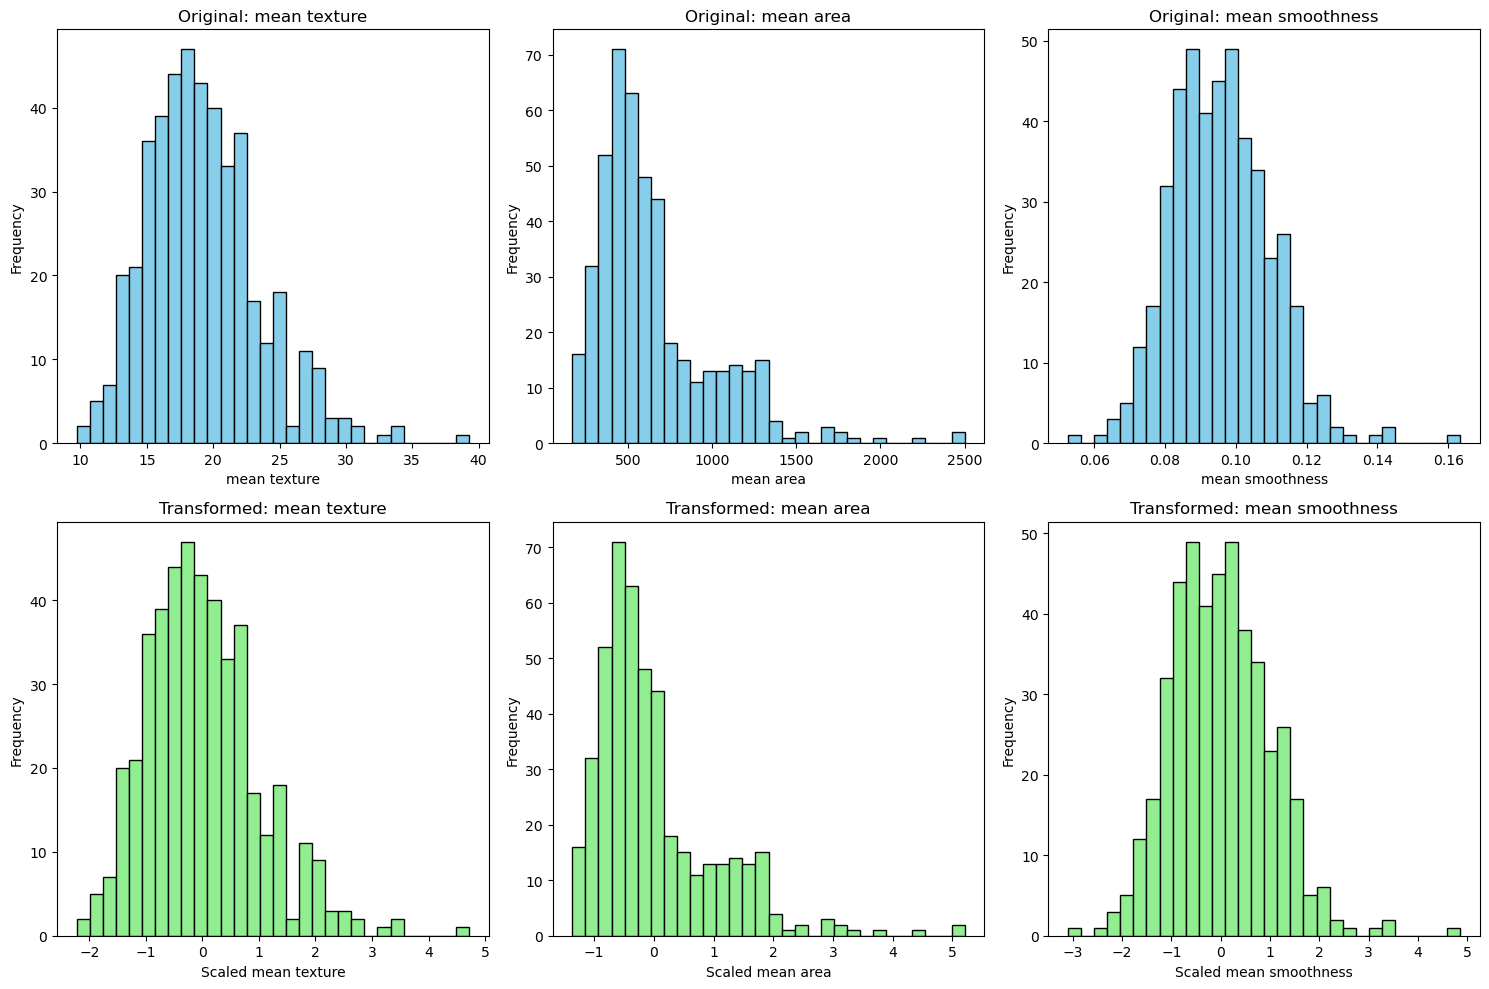

In [5]:
# Aplicar el transformador
X_train_numeric = X_train[numeric_features]
X_train_numeric_transformed = numeric_transformer.fit_transform(X_train_numeric)

# Crear gráficos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Títulos de las columnas
features = ['mean texture', 'mean area', 'mean smoothness']

# Datos originales
for i, feature in enumerate(features):
    axes[0, i].hist(X_train[feature], bins=30, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'Original: {feature}')
    axes[0, i].set_xlabel(feature)
    axes[0, i].set_ylabel('Frequency')

# Datos transformados
for i, feature in enumerate(features):
    axes[1, i].hist(X_train_numeric_transformed[:, i], bins=30, color='lightgreen', edgecolor='black')
    axes[1, i].set_title(f'Transformed: {feature}')
    axes[1, i].set_xlabel(f'Scaled {feature}')
    axes[1, i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

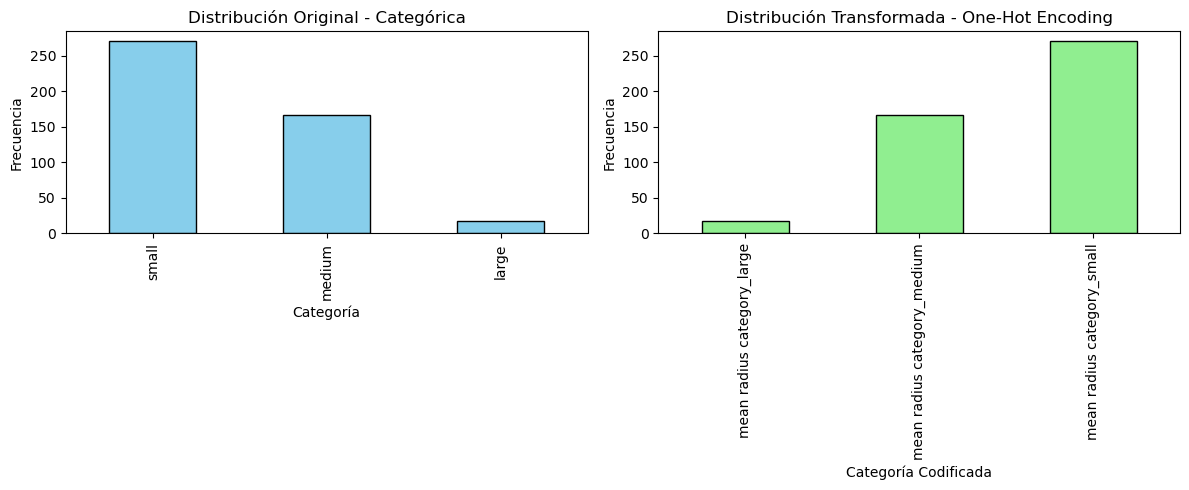

In [7]:
# Aplicar el transformador
X_train_categorical = X_train[categorical_features]
X_train_categorical_transformed = categorical_transformer.fit_transform(X_train_categorical)

# Crear gráficos para mostrar la distribución de la columna categórica original y transformada
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de la columna categórica original
X_train_categorical['mean radius category'].value_counts().plot(
    kind='bar', ax=axes[0], color='skyblue', edgecolor='black'
)
axes[0].set_title('Distribución Original - Categórica')
axes[0].set_xlabel('Categoría')
axes[0].set_ylabel('Frecuencia')

# Gráfico de la columna transformada (One-Hot Encoding)
pd.DataFrame(
    X_train_categorical_transformed.toarray(),
    columns=categorical_transformer.get_feature_names_out()
).sum().plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Distribución Transformada - One-Hot Encoding')
axes[1].set_xlabel('Categoría Codificada')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()


In [15]:
X_train_categorical.head()

,mean radius category
68,small
181,large
63,small
248,small
60,small


In [10]:
# Convert the transformed data to a DataFrame
categorical_transformed_df = pd.DataFrame(
    X_train_categorical_transformed.toarray(),
    columns=categorical_transformer.get_feature_names_out()
)

# Mostrar una muestra del DataFrame transformado
categorical_transformed_df.head()


,mean radius category_large,mean radius category_medium,mean radius category_small
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [30]:
# Obtener los nombres de las características después de ajustar el pipeline
numeric_feature_names = numeric_features
categorical_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()

# Combinar los nombres de las características
feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Obtener los coeficientes del modelo
coefficients = pipeline.named_steps['classifier'].coef_[0]

# Crear un DataFrame para visualizar los coeficientes
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Mostrar los coeficientes
print(coefficients_df)


                       Feature  Coefficient
0                 mean texture    -1.265753
1                    mean area    -3.555237
2              mean smoothness    -1.549763
3   mean radius category_large     0.000232
4  mean radius category_medium    -0.288081
5   mean radius category_small     0.290666


In [44]:
# Obtener las probabilidades de predicción para el conjunto de prueba
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
X_test['y_pred_proba'] = y_pred_proba
X_test['y_pred'] = y_pred
X_test[['mean texture', 'mean area', 'mean smoothness','mean radius','y_pred_proba','y_pred']]

,mean texture,mean area,mean smoothness,mean radius,y_pred_proba,y_pred
204,18.60,481.9,0.09965,12.47,0.917560,1
70,21.31,1130.0,0.09009,18.94,0.012039,0
131,19.48,748.9,0.10920,15.46,0.102295,0
431,17.68,467.8,0.10540,12.40,0.898764,1
540,14.44,402.9,0.09984,11.54,0.988065,1
...,...,...,...,...,...,...
486,16.85,666.0,0.08641,14.64,0.878683,1
75,19.65,817.7,0.09168,16.07,0.276864,0
249,14.93,406.3,0.10130,11.52,0.983275,1
238,27.85,623.9,0.08223,14.22,0.401454,0


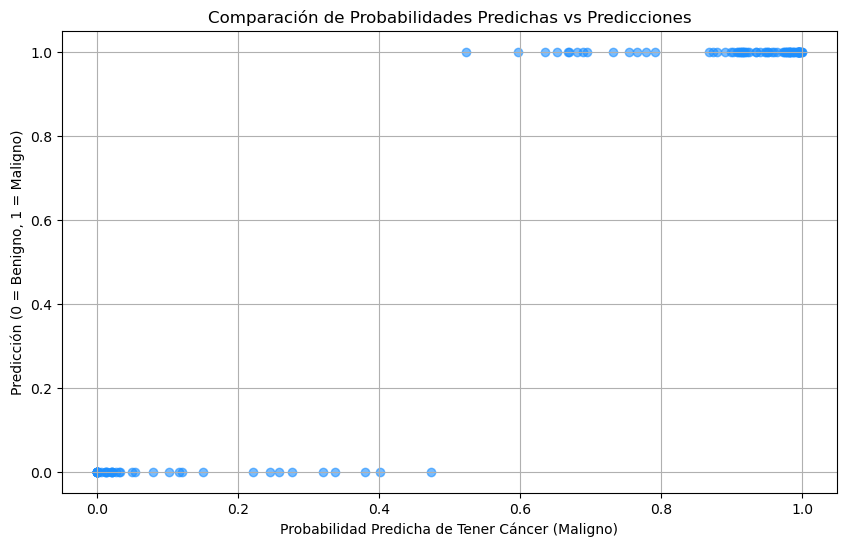

In [ ]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_proba, y_pred, alpha=0.6, color='dodgerblue')
plt.xlabel('Probabilidad Predicha de Tener Cáncer (Maligno)')
plt.ylabel('Predicción (0 = Benigno, 1 = Maligno)')
plt.title('Comparación de Probabilidades Predichas vs Predicciones')
plt.grid()
plt.show()